Simple example of using evolution strategies inside `es.py` for toy deterministic fitness function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cma
from es import SimpleGA, CMAES, PEPG, OpenES

In [2]:
# from https://github.com/CMA-ES/pycma/blob/master/cma/fitness_functions.py
def rastrigin(x):
  """Rastrigin test objective function, shifted by 10. units away from origin"""
  x = np.copy(x)
  x -= 10.0
  if not np.isscalar(x[0]):
    N = len(x[0])
    return -np.array([10 * N + sum(xi**2 - 10 * np.cos(2 * np.pi * xi)) for xi in x])
  N = len(x)
  return -(10 * N + sum(x**2 - 10 * np.cos(2 * np.pi * x)))

fit_func = rastrigin

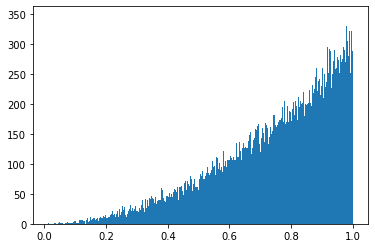

In [217]:
import numpy.random as r
s=100000
if r.randint(0,2):
    x = r.beta(a=r.randint(1,5), b=r.randint(1,5), size=s)
else:
    x = r.normal(r.randint(0,10), r.randint(0,10), size=s)
_=plt.hist(x, 1000)

inf

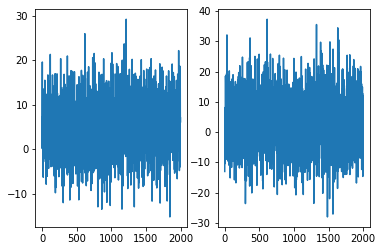

In [266]:
def test_func(n=2000):
    """
    Function to fit SDE to. Distances with unit normal distirbution.
    """        
    # beta choosing a,b ~ [1,5] or normal mu,sigma ~ [0,10]
    if r.randint(0,2):
        x = r.beta(a=r.randint(1,5), b=r.randint(1,5), size=n)
    else:
        x = r.normal(r.randint(0,10), r.randint(0,10), size=n)
    return np.histogram(x, 100)[0], return np.histogram(x, 100)[0]
    return x

import numpy as np
x1,p = test_func(); x2 = test_func()

from scipy.stats import entropy
plt.subplot(1,2,1)
plt.plot(x1)
plt.subplot(1,2,2)
plt.plot(x2)
entropy(x1,x2)

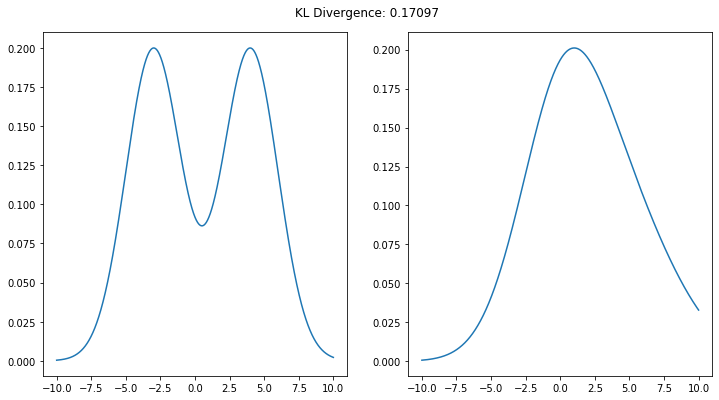

In [412]:
from scipy.stats import norm

x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, r.randint(-5,1), r.randint(1,4)) + norm.pdf(x, r.randint(2,5), r.randint(1,4))
q = norm.pdf(x, r.randint(-5,1), r.randint(1,5)) + norm.pdf(x, r.randint(2,5), r.randint(3,5))

fig=plt.figure(figsize=(12,6))
fig.suptitle('KL Divergence: {0:.5f}'.format(entropy(p,q)))
plt.tight_layout(); plt.subplots_adjust(top=0.92)
plt.subplot(1,2,1)
_=plt.plot(x, p)
plt.subplot(1,2,2)
_=plt.plot(x, q)

In [103]:
NPARAMS = 100        # make this a 100-dimensinal problem.
NPOPULATION = 101    # use population size of 101.
MAX_ITERATION = 4000 # run each solver for 5000 generations.

In [4]:
# defines a function to use solver to solve fit_func
def test_solver(solver):
  history = []
  for j in range(MAX_ITERATION):
    solutions = solver.ask()
    fitness_list = np.zeros(solver.popsize)
    for i in range(solver.popsize):
      fitness_list[i] = fit_func(solutions[i])
    solver.tell(fitness_list)
    result = solver.result() # first element is the best solution, second element is the best fitness
    history.append(result[1])
    if (j+1) % 100 == 0:
      print("fitness at iteration", (j+1), result[1])
  print("local optimum discovered by solver:\n", result[0])
  print("fitness score at this local optimum:", result[1])
  return history

In [5]:
x = np.zeros(NPARAMS) # 100-dimensional problem
print("This is F(0):")
print(rastrigin(x))

This is F(0):
-10000.0


In [6]:
x = np.ones(NPARAMS)*10. # 100-dimensional problem
print(rastrigin(x))
print("global optimum point:\n", x)

-0.0
global optimum point:
 [10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]


In [7]:
# defines genetic algorithm solver
ga = SimpleGA(NPARAMS,                # number of model parameters
               sigma_init=0.5,        # initial standard deviation
               popsize=NPOPULATION,   # population size
               elite_ratio=0.1,       # percentage of the elites
               forget_best=False,     # forget the historical best elites
               weight_decay=0.00,     # weight decay coefficient
              )

In [8]:
ga_history = test_solver(ga)

fitness at iteration 100 -1255.5964973046239
fitness at iteration 200 -1102.6883757655778
fitness at iteration 300 -1085.3125923685627
fitness at iteration 400 -1060.3135398997745
fitness at iteration 500 -1010.792074428337
fitness at iteration 600 -940.5446853565543
fitness at iteration 700 -926.7313471874716
fitness at iteration 800 -892.8574231312882
fitness at iteration 900 -821.9711052248206
fitness at iteration 1000 -805.6177643106066
fitness at iteration 1100 -740.2343548746594
fitness at iteration 1200 -698.8032947473707
fitness at iteration 1300 -641.2406066467477
fitness at iteration 1400 -621.8907892439954
fitness at iteration 1500 -572.6119167815025
fitness at iteration 1600 -525.0330072388881
fitness at iteration 1700 -485.8956185971922
fitness at iteration 1800 -445.1547124340243
fitness at iteration 1900 -390.5236809793504
fitness at iteration 2000 -382.7694153132604
fitness at iteration 2100 -357.7156992007507
fitness at iteration 2200 -321.6834906848047
fitness at iter

In [9]:
# defines CMA-ES algorithm solver
cmaes = CMAES(NPARAMS,
              popsize=NPOPULATION,
              weight_decay=0.0,
              sigma_init = 0.5
          )

(50_w,101)-aCMA-ES (mu_w=27.2,w_1=8%) in dimension 100 (seed=586489, Fri Jan 31 22:09:58 2020)


In [10]:
cma_history = test_solver(cmaes)

fitness at iteration 100 -996.6725446334456
fitness at iteration 200 -815.4300192071775
fitness at iteration 300 -358.40745924778867
fitness at iteration 400 -51.958203031059384
fitness at iteration 500 -51.738002050431646
fitness at iteration 600 -51.7378559433871
fitness at iteration 700 -51.73785585545136
fitness at iteration 800 -51.73785585539406
fitness at iteration 900 -51.73785585539406
fitness at iteration 1000 -51.73785585539406
fitness at iteration 1100 -51.73785585539406
fitness at iteration 1200 -51.73785585539406
fitness at iteration 1300 -51.73785585539406
fitness at iteration 1400 -51.73785585539406
fitness at iteration 1500 -51.73785585539406
fitness at iteration 1600 -51.73785585539406
fitness at iteration 1700 -51.73785585539406
fitness at iteration 1800 -51.73785585539406
fitness at iteration 1900 -51.73785585539406
fitness at iteration 2000 -51.73785585539406
fitness at iteration 2100 -51.73785585539406
fitness at iteration 2200 -51.73785585539406
fitness at iterat

/Users/athon/anaconda3/envs/quantlit/lib/python3.7/site-packages/cma/utilities/utils.py:333: UserWarning: flat fitness (f=51.737856, sigma=9.21e-10).
                    For small sigma, this could indicate numerical convergence.
                    Otherwise, please (re)consider how to compute the fitness more elaborately. (iteration=3507)
  ')')


fitness at iteration 3600 -51.73785585539406
fitness at iteration 3700 -51.73785585539406
fitness at iteration 3800 -51.73785585539406
fitness at iteration 3900 -51.73785585539406
fitness at iteration 4000 -51.73785585539406
local optimum discovered by solver:
 [10.          9.00504136  9.00504136 10.         10.         10.
 10.         10.99495863 10.         10.          9.00504137 10.
 10.          9.00504136 10.         10.          9.99999999 10.
 10.         11.98991223 10.         10.         10.99495863 10.
 10.         10.99495864  9.00504136 10.         10.99495864  9.00504136
  9.99999999 10.99495864  9.00504136 10.         10.99495863 10.
 10.         10.         10.99495864 10.99495864  9.00504137  9.00504136
  9.00504136 10.         10.         10.99495864 10.         10.
  9.00504137 10.00000001 10.         10.99495864  8.01008777 10.
  9.00504137  9.00504135  9.99999999 10.99495865 10.         10.
  9.00504136 10.         10.99495864  9.00504138  9.00504137 10.00000001

In [11]:
# defines PEPG (NES) solver
pepg = PEPG(NPARAMS,                         # number of model parameters
            sigma_init=0.5,                  # initial standard deviation
            learning_rate=0.1,               # learning rate for standard deviation
            learning_rate_decay=1.0,         # don't anneal the learning rate
            popsize=NPOPULATION,             # population size
            average_baseline=False,          # set baseline to average of batch
            weight_decay=0.00,               # weight decay coefficient
            rank_fitness=False,              # use rank rather than fitness numbers
            forget_best=False)               # don't keep the historical best solution)

In [12]:
pepg_history = test_solver(pepg)

fitness at iteration 100 -3571.9831977871527
fitness at iteration 200 -1245.5299866329299
fitness at iteration 300 -936.1096081417517
fitness at iteration 400 -821.5037497170681
fitness at iteration 500 -589.6741303514682
fitness at iteration 600 -439.3966887502038
fitness at iteration 700 -349.74981400801573
fitness at iteration 800 -262.735512751628
fitness at iteration 900 -218.51649691289902
fitness at iteration 1000 -166.0250695346117
fitness at iteration 1100 -145.00046655309666
fitness at iteration 1200 -140.6843374598327
fitness at iteration 1300 -127.08653545039385
fitness at iteration 1400 -116.00164832015355
fitness at iteration 1500 -116.00164832015355
fitness at iteration 1600 -106.41962675665343
fitness at iteration 1700 -101.05985800098358
fitness at iteration 1800 -101.05985800098358
fitness at iteration 1900 -101.05985800098358
fitness at iteration 2000 -101.05985800098358
fitness at iteration 2100 -101.05985800098358
fitness at iteration 2200 -101.05985800098358
fitne

In [13]:
# defines OpenAI's ES algorithm solver. Note that we needed to anneal the sigma parameter
oes = OpenES(NPARAMS,                  # number of model parameters
            sigma_init=0.5,            # initial standard deviation
            sigma_decay=0.999,         # don't anneal standard deviation
            learning_rate=0.1,         # learning rate for standard deviation
            learning_rate_decay = 1.0, # annealing the learning rate
            popsize=NPOPULATION,       # population size
            antithetic=False,          # whether to use antithetic sampling
            weight_decay=0.00,         # weight decay coefficient
            rank_fitness=False,        # use rank rather than fitness numbers
            forget_best=False)

In [14]:
oes_history = test_solver(oes)

fitness at iteration 100 -2509.916189892384
fitness at iteration 200 -821.5819596994668
fitness at iteration 300 -821.5819596994668
fitness at iteration 400 -821.5819596994668
fitness at iteration 500 -818.8846626254532
fitness at iteration 600 -761.7578507473182
fitness at iteration 700 -708.8800504719527
fitness at iteration 800 -629.8062189790351
fitness at iteration 900 -560.3960833005808
fitness at iteration 1000 -523.8908347455427
fitness at iteration 1100 -481.06136727728983
fitness at iteration 1200 -445.1904339491173
fitness at iteration 1300 -390.55631264806584
fitness at iteration 1400 -356.63616243696777
fitness at iteration 1500 -314.6001566303704
fitness at iteration 1600 -305.6819052330442
fitness at iteration 1700 -272.9723167977993
fitness at iteration 1800 -252.26929644550478
fitness at iteration 1900 -232.1354535813747
fitness at iteration 2000 -224.41854736380446
fitness at iteration 2100 -218.61698157683622
fitness at iteration 2200 -199.71138680043782
fitness at i

In [15]:
# defines OpenAI's ES algorithm solver. Note that we needed to anneal the sigma parameter
# this version turns on antithetic sampling. It doesn't really help, and sometimes hurts performance.
oes_antithetic = OpenES(NPARAMS,            # number of model parameters
                 sigma_init=0.5,            # initial standard deviation
                 sigma_decay=0.999,         # don't anneal standard deviation
                 learning_rate=0.1,         # learning rate for standard deviation
                 learning_rate_decay=1.0,   # annealing the learning rate
                 popsize=NPOPULATION+1,     # population size
                 antithetic=True,           # whether to use antithetic sampling
                 weight_decay=0.00,         # weight decay coefficient
                 rank_fitness=False,        # use rank rather than fitness numbers
                 forget_best=False)

In [16]:
oes_antithetic_history = test_solver(oes_antithetic)

fitness at iteration 100 -3208.665827505491
fitness at iteration 200 -966.7957715593144
fitness at iteration 300 -844.1973261409396
fitness at iteration 400 -844.1973261409396
fitness at iteration 500 -829.1685224342591
fitness at iteration 600 -700.0974921187178
fitness at iteration 700 -653.196303660033
fitness at iteration 800 -585.8107914362026
fitness at iteration 900 -544.1669338824049
fitness at iteration 1000 -499.4935390498964
fitness at iteration 1100 -458.0991336041087
fitness at iteration 1200 -414.7243990316274
fitness at iteration 1300 -374.01782566703355
fitness at iteration 1400 -359.3771143665409
fitness at iteration 1500 -312.19069572965304
fitness at iteration 1600 -279.7228823699893
fitness at iteration 1700 -258.99585926407724
fitness at iteration 1800 -236.2853488652587
fitness at iteration 1900 -236.2853488652587
fitness at iteration 2000 -236.2853488652587
fitness at iteration 2100 -236.2853488652587
fitness at iteration 2200 -236.2853488652587
fitness at iterat

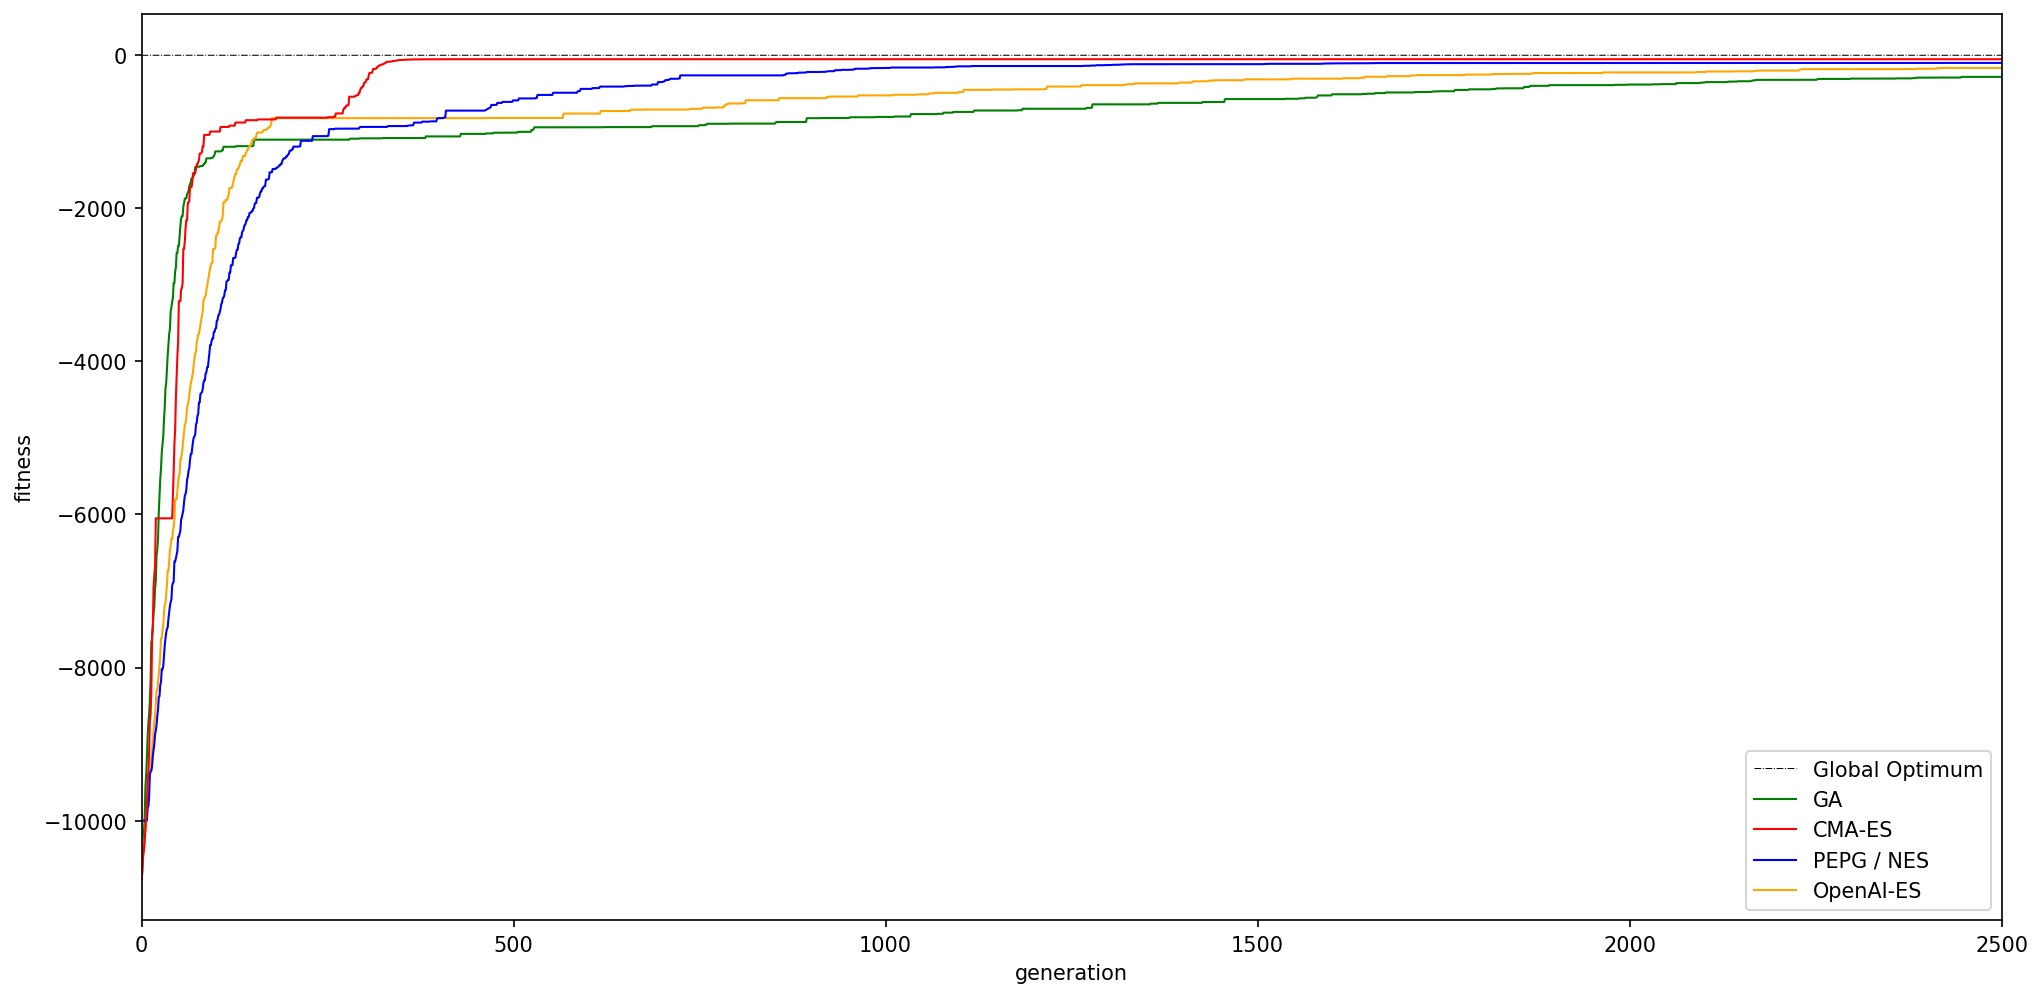

In [17]:
# Create a new figure of size 8x6 points, using 100 dots per inch
best_history = [0] * MAX_ITERATION
plt.figure(figsize=(16,8), dpi=150)

optimum_line, = plt.plot(best_history, color="black", linewidth=0.5, linestyle="-.", label='Global Optimum')
ga_line, = plt.plot(ga_history, color="green", linewidth=1.0, linestyle="-", label='GA')
oes_line, = plt.plot(oes_history, color="orange", linewidth=1.0, linestyle="-", label='OpenAI-ES')
pepg_line, = plt.plot(pepg_history, color="blue", linewidth=1.0, linestyle="-", label='PEPG / NES')
cma_line, = plt.plot(cma_history, color="red", linewidth=1.0, linestyle="-", label='CMA-ES')

plt.legend(handles=[optimum_line, ga_line, cma_line, pepg_line, oes_line], loc=4)

# Set x limits
plt.xlim(0,2500)

plt.xlabel('generation')
plt.ylabel('fitness')

# plt.savefig("./rastrigin_10d.svg")

plt.show()

---
---